In [1]:
# Import all required libraries

import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import micri credit loan data files using pandas
df=pd.read_csv("F:/Pranjali/FLIP ROBO/Project/Micro_Credit_Loan.csv")

In [3]:
# importing the sys module to check the recursion limit
import sys 
print(sys.getrecursionlimit())

3000


In [4]:
# set recurrsion limit as data is huge & sytem giving 'Dead Kernel' error multiple times
sys.setrecursionlimit(10**9)

In [5]:
# Read the data column by column
df.head(2)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.05,3065.15,220.13,260.13,2.0,NaN,1539.0,...,6.0,NaN,2.0,12.0,6.0,NaN,29.0,29.0,UPW,7/20/2016
1,1,76462I70374,712.0,12122.00,12124.75,3691.26,3691.26,20.0,NaN,5787.0,...,12.0,NaN,1.0,12.0,12.0,NaN,NaN,NaN,UPW,8/10/2016


In this dataset label is target & other fields are feature inputs.
Abvove info shows that null values are present in this dataset.

In [6]:
# Check data types & null count as below
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   label                   209593 non-null  int64  
 1   msisdn                  209593 non-null  object 
 2   aon                     209593 non-null  float64
 3   daily_decr30            209593 non-null  float64
 4   daily_decr90            209593 non-null  float64
 5   rental30                209593 non-null  float64
 6   rental90                209593 non-null  float64
 7   last_rech_date_ma       188850 non-null  float64
 8   last_rech_date_da       6732 non-null    float64
 9   last_rech_amt_ma        188598 non-null  float64
 10  cnt_ma_rech30           181614 non-null  float64
 11  fr_ma_rech30            130910 non-null  float64
 12  sumamnt_ma_rech30       181614 non-null  float64
 13  medianamnt_ma_rech3nan  181614 non-null  float64
 14  medianmarechprebal30

In [7]:
# Use for loop to convert all data types (float) into interger data types for all columns

from sklearn.preprocessing import LabelEncoder
label_encoders = LabelEncoder()

label_encoders = {}
categorical_columns = [
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [8]:
# Use for loop to convert all data types(string) into interger data types for all columns

from sklearn.preprocessing import LabelEncoder
label_encoders = LabelEncoder()

label_encoders = {}
categorical_columns = [
'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90',
 'pcircle',
 'pdate']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [9]:
# Verify the null values & data types again after using label encoder
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   label                   209593 non-null  int64  
 1   msisdn                  209593 non-null  object 
 2   aon                     209593 non-null  int64  
 3   daily_decr30            209593 non-null  int64  
 4   daily_decr90            209593 non-null  int64  
 5   rental30                209593 non-null  int64  
 6   rental90                209593 non-null  int64  
 7   last_rech_date_ma       209593 non-null  int64  
 8   last_rech_date_da       209593 non-null  int64  
 9   last_rech_amt_ma        209593 non-null  int64  
 10  cnt_ma_rech30           209593 non-null  int64  
 11  fr_ma_rech30            209593 non-null  int64  
 12  sumamnt_ma_rech30       209593 non-null  int64  
 13  medianamnt_ma_rech3nan  181614 non-null  float64
 14  medianmarechprebal30

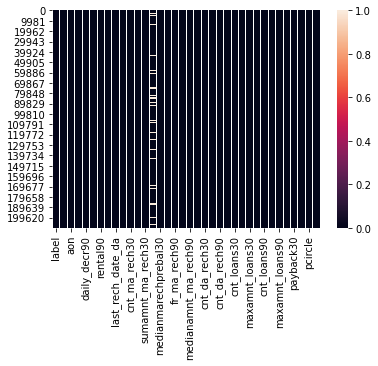

In [10]:
# check missing values
sns.heatmap(df.isnull())

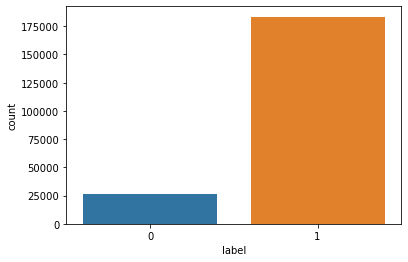

In [11]:
# Analysis of target value 'label' using plot to visualise % of  
sns.countplot(x='label', data=df);

In [25]:
# label distribution of target 
print(df.groupby('label').size())

label
0     26162
1    183431
dtype: int64


In [26]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000
mean,0.875177,690.289094,66544.667766,67044.634181,51616.229192,54335.257556,1178.013235,99311.897349,1072.621361,1879.874795,...,44.080127,91130.247728,26.268225,13.565506,10.098591,92985.039763,28050.123997,23403.648137,0.0,37.706598
std,0.330519,572.221653,44081.531271,45807.105446,38632.931157,41282.497664,3921.868992,60379.153683,3703.035988,5617.836546,...,351.914511,59745.548837,220.866634,121.631502,116.144657,59936.574722,34940.060710,30874.535581,0.0,23.008156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.000000,253.000000,25122.000000,25107.000000,16299.000000,16270.000000,30.000000,46839.000000,5.000000,1.000000,...,0.000000,38255.000000,0.000000,0.000000,0.000000,40234.000000,379.000000,811.000000,0.0,18.000000
50%,1.000000,534.000000,65783.000000,63332.000000,43900.000000,45357.000000,32.000000,99237.000000,13.000000,3.000000,...,0.000000,90653.000000,1.000000,1.000000,0.000000,92632.000000,3277.000000,1562.000000,0.0,37.000000
75%,1.000000,989.000000,104950.000000,104660.000000,83566.000000,88423.000000,39.000000,151635.000000,30.000000,7.000000,...,0.000000,143051.000000,4.000000,4.000000,0.000000,145030.000000,55675.000000,45680.000000,0.0,57.000000
max,1.000000,4506.000000,146327.000000,155482.000000,131337.000000,139035.000000,21927.000000,204033.000000,21063.000000,28048.000000,...,4292.000000,195449.000000,3144.000000,2110.000000,2044.000000,197428.000000,108073.000000,98078.000000,0.0,81.000000


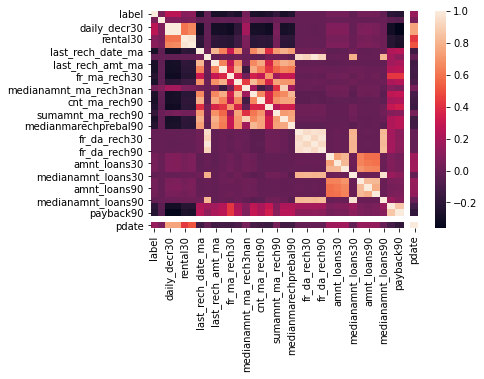

In [27]:
# checking correlation using heatmap
dfcor=df.corr()
sns.heatmap(dfcor)

In [ ]:
As per above heatmap,correlation exist in following columns-
daily_decr30               
rental30                   
last_rech_date_ma          
last_rech_date_da          
last_rech_amt_ma           
fr_ma_rech30               
medianamnt_ma_rech30  
medianmarechprebal30       
cnt_ma_rech90              
fr_ma_rech90               
sumamnt_ma_rech90          
medianamnt_ma_rech90       
medianmarechprebal90       
fr_da_rech30               
fr_da_rech90               
amnt_loans30              
medianamnt_loans30         
amnt_loans90              
medianamnt_loans90         
payback90

In [28]:
# Checking for skewness for each of the column as its not allowed more than 0.5
df.skew()

label                     -2.270254
aon                        1.806204
daily_decr30               0.087551
daily_decr90               0.228175
rental30                   0.449031
rental90                   0.466723
last_rech_date_ma          3.643154
last_rech_date_da          0.006706
last_rech_amt_ma           3.730708
cnt_ma_rech30              3.122546
fr_ma_rech30               1.337694
sumamnt_ma_rech30          2.203079
medianamnt_ma_rech3nan     3.644709
medianmarechprebal30       1.838453
cnt_ma_rech90              3.730242
fr_ma_rech90               1.631654
sumamnt_ma_rech90          1.678163
medianamnt_ma_rech90       3.694152
medianmarechprebal90       1.941388
cnt_da_rech30              0.002079
fr_da_rech30               0.000062
cnt_da_rech90              0.006123
fr_da_rech90               0.000160
cnt_loans30               10.214726
amnt_loans30              10.201898
maxamnt_loans30            8.914041
medianamnt_loans30         0.037169
cnt_loans90               10

In [29]:
# Apply standard scaler to reduce the skewness/non scaled data
import pandas as pd    
from sklearn.preprocessing import StandardScaler

features = ['aon','last_rech_date_ma','last_rech_amt_ma','cnt_ma_rech30','fr_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech3nan','medianmarechprebal30','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90','cnt_loans30','amnt_loans30','maxamnt_loans30','cnt_loans90','amnt_loans90','maxamnt_loans90','payback30']
autoscaler = StandardScaler()
df[features] = autoscaler.fit_transform(df[features])

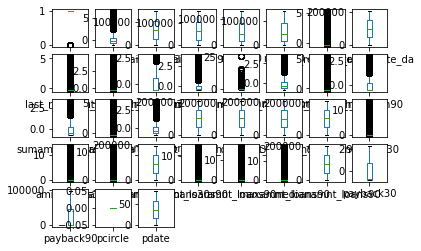

In [30]:
# Univariant Visualization - box and whisker plots
df.plot(kind='box', subplots=True, layout=(5,8), sharex=False, sharey=False)
plt.show()

In [ ]:
# Multivariant Visualization-draw Scatter plot 
# sns.pairplot(df)
# plt.show()

In [ ]:
# Prepare X & Y to train/test model

In [12]:
import pandas as pd
X = df[[
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90',
 'pcircle',
 'pdate']]
y = df.label        # y is a vector, hence we use dot to access 'label'

In [13]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(209593, 33)


In [14]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(209593,)


In [15]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()        # instantiate model
logreg.fit(X_train, y_train)         # fit model

LogisticRegression()

In [17]:
# make class predictions for the testing set
from sklearn import metrics

y_pred_class = logreg.predict(X_test)

# Classification accuracy: percentage of correct predictions
print(metrics.accuracy_score(y_test, y_pred_class))

0.879119830531117


In [18]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7862949525003506

In [19]:
# Load libraries
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# Spot Check Algorithms

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.878437 (0.001061)
LDA: 0.870300 (0.001646)
KNN: 0.879531 (0.002350)
CART: 0.879073 (0.002313)
NB: 0.287479 (0.001884)


In [ ]:
Daily amount spend & average main account balance in last 30 days, Frequency of recharge for data accoun t & main account in 30/90 days,loan taken in last 90 days & payback time for last 30 days.

In [ ]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,X,y,cv=5,scoring='accuracy')

print('accuracy score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(knn, X, y, cv=5)

print('Y prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

In [ ]:
from sklearn.externals import joblib 
from sklearn.neighbors import KNeighborsClassifier

joblib_file = "joblib_knn.pkl"             # Save to file in the current working directory
joblib.dump(knn, joblib_file)
joblib_knn = joblib.load(joblib_file)      # Load from file

score = joblib_knn.score(X_test, y_test)   # Calculate the accuracy and predictions
print("Test score for KNN Model: {0:.2f} %".format(100 * score))

In [ ]:
# Visualization of predictions
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction', ax = ax1)